✅ Data successfully loaded!

🔹 Orders Data Preview:
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata

🔹 Order Details Data Preview:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones

🔹 Missing Values in Orders Data:
Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dt

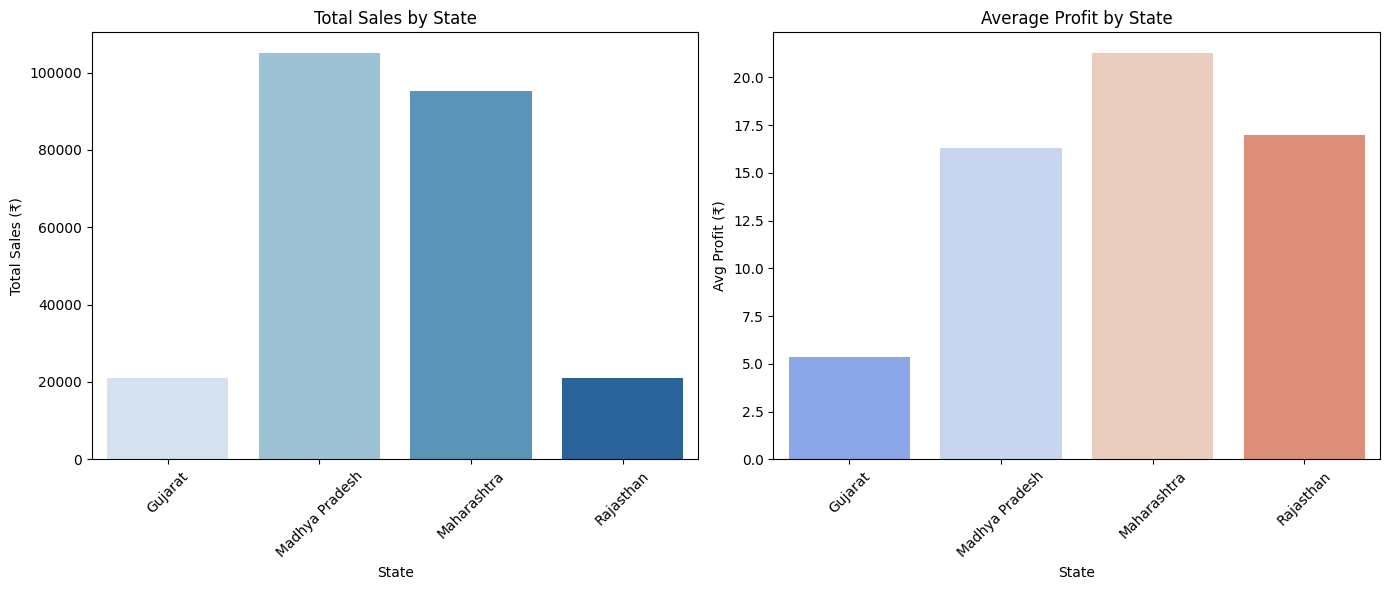

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File Paths (Update as needed)
orders_path = '/kaggle/input/jar-datasets/datasets/List_of_Orders_55FFC79CF8.csv'
order_details_path = '/kaggle/input/jar-datasets/datasets/Order_Details_19795F61CF.csv'

# Load datasets with error handling
try:
    orders_df = pd.read_csv(orders_path)
    order_details_df = pd.read_csv(order_details_path)
    print("✅ Data successfully loaded!")
except Exception as e:
    print(f"❌ Error loading data: {e}")

# Step 1: Inspect data structure & handle missing values
print("\n🔹 Orders Data Preview:")
print(orders_df.head())

print("\n🔹 Order Details Data Preview:")
print(order_details_df.head())

# Check for missing values
print("\n🔹 Missing Values in Orders Data:")
print(orders_df.isnull().sum())

print("\n🔹 Missing Values in Order Details Data:")
print(order_details_df.isnull().sum())

# Fill missing values (if any)
orders_df.fillna(0, inplace=True)
order_details_df.fillna(0, inplace=True)

# Step 2: Identify top 5 states by order count
top_states = orders_df['State'].value_counts().nlargest(5)
top_states_list = top_states.index.tolist()

# Step 3: Merge datasets to analyze sales and profit
merged_df = pd.merge(orders_df, order_details_df, on="Order ID", how="inner")

# Filter data for top 5 states
top_states_df = merged_df[merged_df['State'].isin(top_states_list)]

# Step 4: Calculate total sales and average profit per state
state_sales_profit = top_states_df.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),
    Avg_Profit=('Profit', 'mean')
).reset_index()

# Display results
print("\n🔹 Top 5 States by Orders with Sales & Profit Analysis:")
print(state_sales_profit)

# Step 5: Identify regional disparities
state_sales_profit_sorted = state_sales_profit.sort_values(by='Avg_Profit')

# Identify states with high sales but low profit
low_profit_states = state_sales_profit_sorted[state_sales_profit_sorted['Avg_Profit'] < 0]

# Identify states with both low sales and low profit
low_performing_states = state_sales_profit_sorted.nsmallest(2, 'Total_Sales')

print("\n🔹 States with High Sales but Low Profit:")
print(low_profit_states)

print("\n🔹 Low Performing States (Low Sales & Low Profit):")
print(low_performing_states)

# Recommendations
print("\n🔹 Recommendations for Improvement:")
for state in low_performing_states['State']:
    print(f"✅ Improve marketing & pricing strategies in {state} to boost sales.")
for state in low_profit_states['State']:
    print(f"✅ Optimize cost efficiency and pricing in {state} to improve profit margins.")

# 🔹 Visualization of Sales & Profit Trends
plt.figure(figsize=(14, 6))

# Total Sales Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(data=state_sales_profit, x='State', y='Total_Sales', palette='Blues')
plt.title("Total Sales by State")
plt.xticks(rotation=45)
plt.ylabel("Total Sales (₹)")
plt.xlabel("State")

# Average Profit Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(data=state_sales_profit, x='State', y='Avg_Profit', palette='coolwarm')
plt.title("Average Profit by State")
plt.xticks(rotation=45)
plt.ylabel("Avg Profit (₹)")
plt.xlabel("State")

plt.tight_layout()
plt.show()
